In [220]:
import pandas as pd
import os
import numpy as np

csv_file_path = r"C:\\Professional\\MS\\SHU\\Dissertation\\Output_data\\"


# List of filenames to merge
file_names = ["merged_dem.csv", "restaurant_grouped.csv"]

# Initialize a variable to keep track of the total number of records
total_records = 0

# Dictionary to store DataFrames
dataframes = {}

# Loop through each file name and create DataFrames
for file_name in file_names:
    file_path = os.path.join(csv_file_path, file_name)
    df = pd.read_csv(file_path)
    dataframes[file_name] = df
    num_records = len(df)
    print(f"Total number of records in {file_name}: {num_records}")

# Access the DataFrames using the keys in the 'dataframes' dictionary
demog_df = dataframes["merged_dem.csv"]
restaurant_df = dataframes["restaurant_grouped.csv"]



Total number of records in merged_dem.csv: 33774
Total number of records in restaurant_grouped.csv: 14848


In [222]:
df_geo = pd.DataFrame(demog_df)

# Extract and clean the numeric part from the 'Geography' column
df_geo['Geography_code'] = df_geo['Geography'].str.extract(r'US0*(\d+)').astype(int)

# Remove column name 'Geography'
df_geo = df_geo.drop(['Geography'], axis=1)

# Check the data types of 'zip_code' column in both DataFrames
print(restaurant_df['zip_code'].dtype)
print(df_geo['Geography_code'].dtype)


# Convert the data type of 'zip_code' column to int if needed
restaurant_df['zip_code'] = restaurant_df['zip_code'].astype(int)

# Now you can perform the merge
df = restaurant_df.merge(df_geo, left_on='zip_code', right_on='Geography_code', how='inner')

int32
int32


In [223]:

# Display the merged DataFrame
print(len(df))

14795


In [224]:
# Remove rows with missing values
df = df.dropna()
print(len(df))
# Impute missing values with the mean
df.fillna(df.mean(), inplace=True)
print(len(df))

14795
14795


C:\Users\nikhi\AppData\Local\Temp\ipykernel_10488\333539909.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [225]:
# # One-hot encoding for categorical columns
# df = pd.get_dummies(df, columns=['category_1'], drop_first=True)

# # Label encoding for 'zip_code' if needed
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['zip_code'] = label_encoder.fit_transform(df['zip_code'])


In [186]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [187]:
# import numpy as np

# # Convert 'Household Median Income' column to numerical
# df['Household Median Income'] = pd.to_numeric(df['Household Median Income'], errors='coerce')

# # Define the bins and labels for income bins
# bins = [0, 25000, 50000, 75000, np.inf]
# labels = ['Low', 'Moderate', 'High', 'Very High']

# # Create the 'Income_Bin' column using pd.cut
# df['Income_Bin'] = pd.cut(df['Household Median Income'], bins=bins, labels=labels)


In [226]:
# List of columns to check for "-"
numeric_columns = [ 'weighted_average_rating',"Female: Under 20","Female: 20-44","Female: 44 years and over","Male: Under 20","Male: 20-44","Male: 44 years and over","Total_Population","Household Median Income","Asian alone","Black or African American alone","Two or more races:","White alone","Other races", 'Geography_code']

# Function to check if a string is numeric (including handling scientific notation)
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Function to clean and convert values to numeric format
def clean_and_convert(value):
    value = str(value).replace(',', '').replace('+', '').replace('-', '')  # Remove , + and - characters
    try:
        return float(value)  # Convert to float
    except ValueError:
        return np.nan  # If not a valid numeric value, return NaN

# Loop through each numeric column and check for non-numeric characters
for column in numeric_columns:
    non_numeric_values = df[column][~df[column].apply(is_numeric)]
    if len(non_numeric_values) > 0:
        print(f"Column '{column}' has non-numeric values:")
        for value in non_numeric_values:
            non_numeric_chars = ''.join([char for char in str(value) if not is_numeric(char) and char != '.'])
            print(f"Value '{value}' contains non-numeric characters: {non_numeric_chars}")

    # Clean and convert values for the column
    df[column] = df[column].apply(clean_and_convert)

df


,zip_code,category_1,weighted_average_rating,Female: Under 20,Female: 20-44,Female: 44 years and over,Male: Under 20,Male: 20-44,Male: 44 years and over,Total_Population,Household Median Income,Asian alone,Black or African American alone,Two or more races:,White alone,Other races,Geography_code
0,646,American,4.561044,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,21488.0,20141.0,2110.0,646.0
1,646,European,4.800000,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,21488.0,20141.0,2110.0,646.0
2,646,Italian,4.700000,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,21488.0,20141.0,2110.0,646.0
3,646,Mediterranean,4.800000,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,21488.0,20141.0,2110.0,646.0
4,646,Salads,4.500000,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,21488.0,20141.0,2110.0,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,99403,Asian,4.545440,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,1812.0,18631.0,527.0,99403.0
14791,99403,Coffee and Tea,4.545440,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,1812.0,18631.0,527.0,99403.0
14792,99403,Desserts,4.545440,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,1812.0,18631.0,527.0,99403.0
14793,99403,Italian,4.545440,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,1812.0,18631.0,527.0,99403.0


In [227]:
df = df.drop(['Geography_code'], axis=1)
df.fillna(df.mean(), inplace=True)
df.to_csv("test.csv")
# df_test.to_csv("test.csv")

C:\Users\nikhi\AppData\Local\Temp\ipykernel_10488\972470857.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [190]:
# # Convert specific columns to numeric
# numeric_columns = ['Household Median Income', 'Families Median Income', 'Married-couple Families Median Income', 'Nonfamily Households Median Income']
# df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# # Define the bins and labels for income bins
# bins = [0, 25000, 50000, 75000, np.inf]
# labels = [1,2,3,4]

# # Create the 'Income_Bin' column using pd.cut for all specified columns
# for column in numeric_columns:
#     bin_column_name = column + '_Bin'
#     df[bin_column_name] = pd.cut(df[column], bins=bins, labels=labels)

In [228]:
df.fillna(df.mean(), inplace=True)

# Check for NaN values in all columns
nan_columns = df.columns[df.isna().any()]
# Display columns with NaN values
print("Columns with NaN values:")
for column in nan_columns:
    nan_count = df[column].isna().sum()
    print(f"{column}: {nan_count} NaN values")

Columns with NaN values:


C:\Users\nikhi\AppData\Local\Temp\ipykernel_10488\3328052896.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [230]:
df
df.to_csv(r"C:\professional\ms\shu\dissertation\Output_data\final.csv",index=False)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
    
df_test = df

models = [RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]

X = df_test.drop(['category_1','zip_code'], axis=1)

    # , 'Household Median Income', 'Families Median Income',
    #                   'Married-couple Families Median Income', 'Nonfamily Households Median Income',
    #                   'zip_code', 'Geography_code', 'weighted_rating', 'ratings', 


    # X = df[['weighted_average_rating', 'Female: 20-24']]

y = df_test['category_1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def model_train(model):
    
    # Initialize the model
    rf_model = model

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics for the current model
    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("\n")


for model in models:
    model_train(model)
    
    

Model: RandomForestClassifier
Accuracy: 0.15711252653927812
Precision: 0.15616938457710894
Recall: 0.15711252653927812
F1-Score: 0.15585324072441917


Model: LogisticRegression
Accuracy: 0.35881104033970274
Precision: 0.27494165244079555
Recall: 0.35881104033970274
F1-Score: 0.2437196122743794




C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: KNeighborsClassifier
Accuracy: 0.17197452229299362
Precision: 0.14051039543546584
Recall: 0.17197452229299362
F1-Score: 0.1507384857458087


Model: GaussianNB
Accuracy: 0.32908704883227174
Precision: 0.3049778099207704
Recall: 0.32908704883227174
F1-Score: 0.3015550403156609


Model: DecisionTreeClassifier
Accuracy: 0.25690021231422505
Precision: 0.26796098535939444
Recall: 0.25690021231422505
F1-Score: 0.261321372943894


Model: SVC
Accuracy: 0.36836518046709127
Precision: 0.13569290618055274
Recall: 0.36836518046709127
F1-Score: 0.19832849902572638




C:\Users\nikhi\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
y.shape

(3138,)

In [139]:
X.shape

(3138, 27)

In [159]:
# df_test.to_csv("test.csv",index =False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X1 = df_test.drop(['zip_code'],axis=1)
# Calculate correlation matrix
correlation_matrix = X1.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [206]:
df= df[df['category_1'] != 'Other']

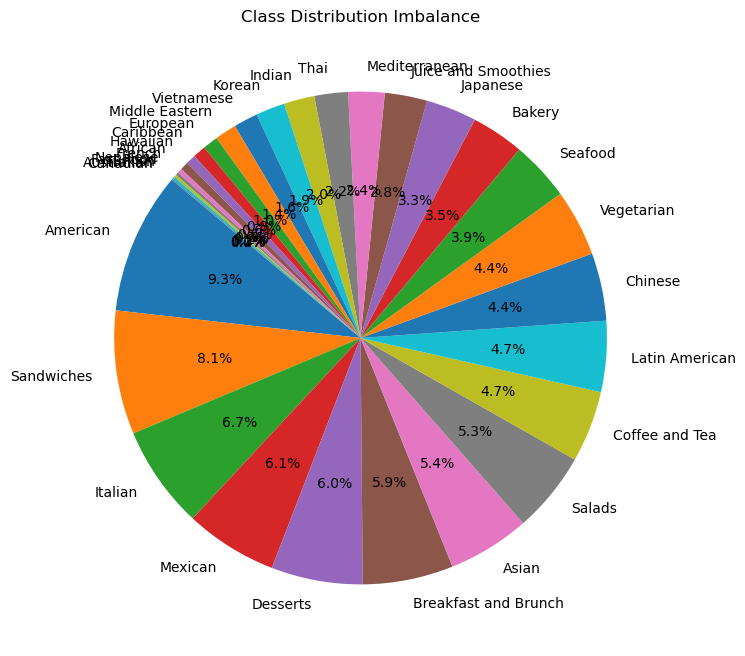

In [207]:
import matplotlib.pyplot as plt
class_counts = df['category_1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Imbalance')
plt.show()

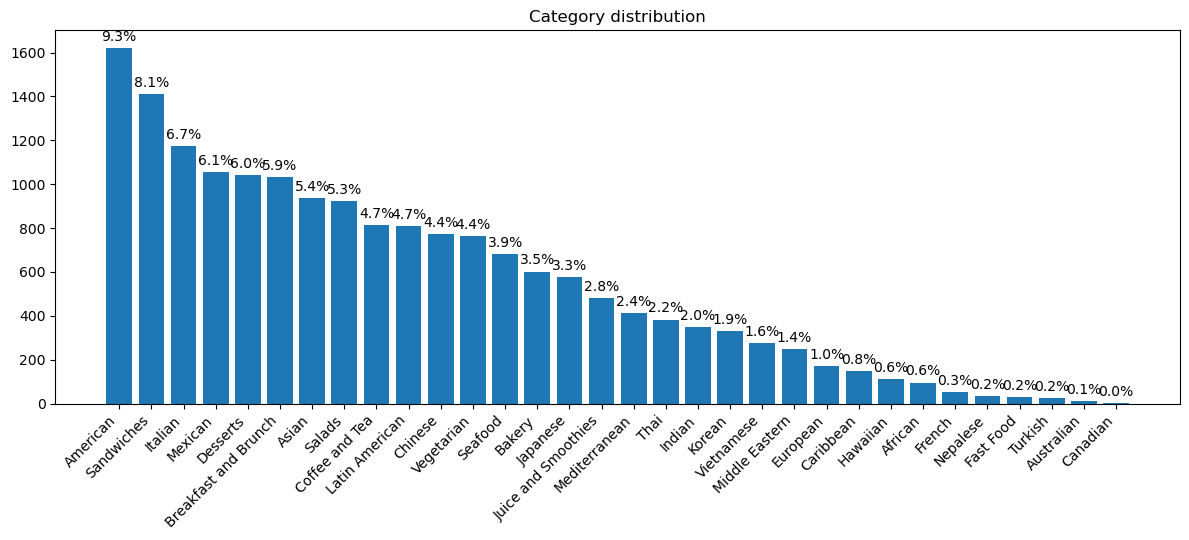

In [208]:
import matplotlib.pyplot as plt
import pandas as pd

class_counts = df['category_1'].value_counts()
percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(12, 5.5))

# Create a bar plot
bars = plt.bar(class_counts.index, class_counts.values)

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.annotate(f'{percentage:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.title('Category distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


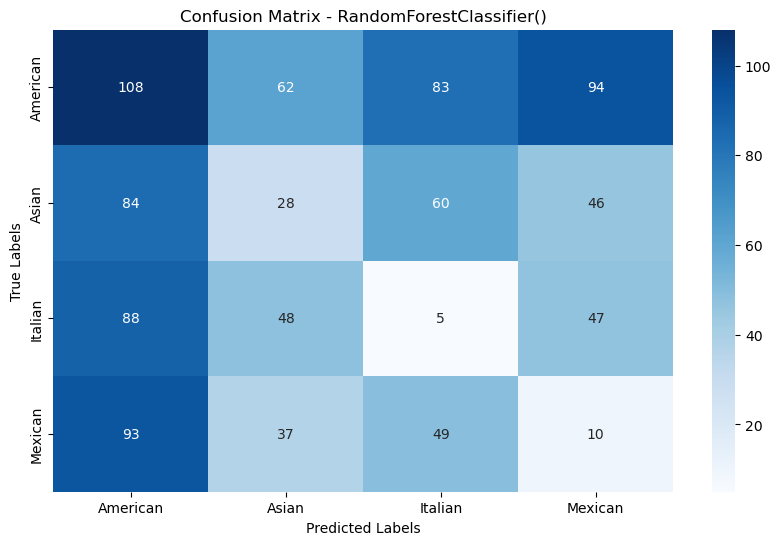

C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


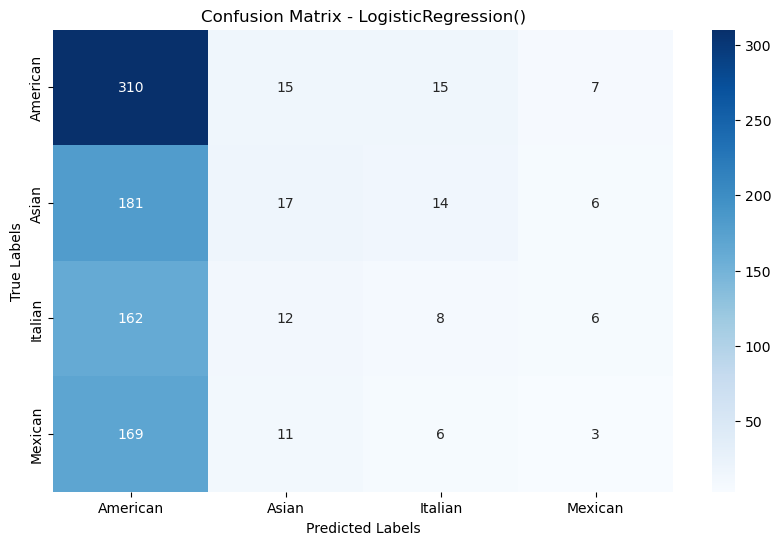

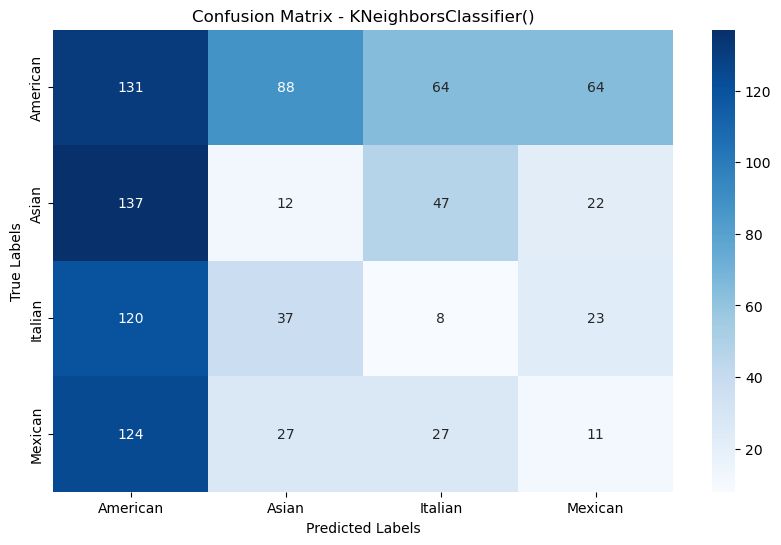

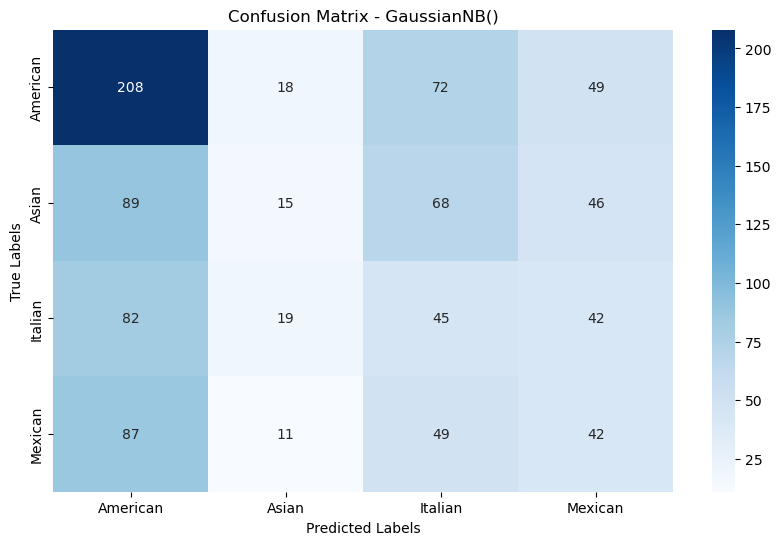

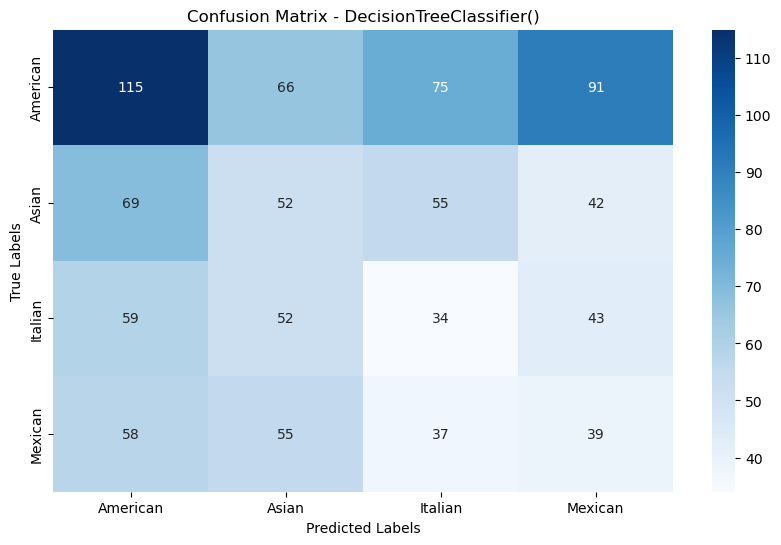

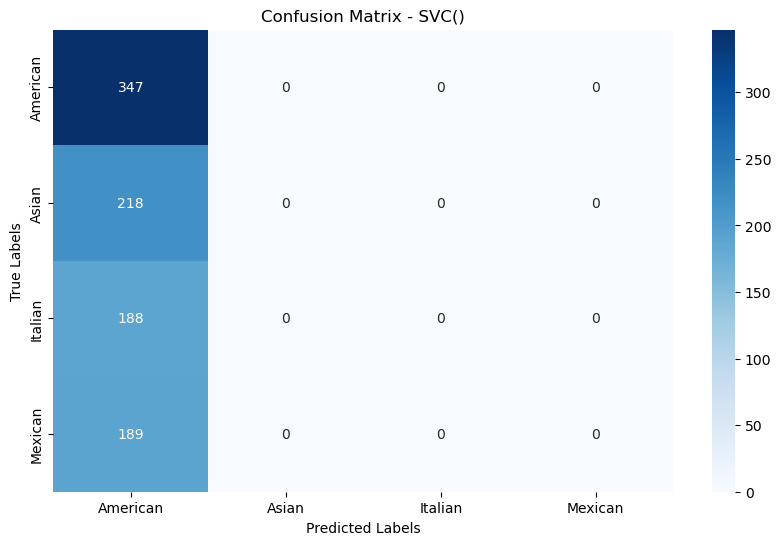

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def model_train(model):
    # Initialize the model
    model_instance = model
    
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model_instance.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print accuracy and confusion matrix
#     print(model, " Accuracy:", accuracy)
#     print("Confusion Matrix:\n", conf_matrix)
    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model}")
    plt.show()

for model in models:
    model_train(model)


In [171]:
# import matplotlib.pyplot as plt

# income_values = df['Household Median Income']

# plt.figure(figsize=(8, 6))
# plt.hist(income_values, bins=20, edgecolor='black', alpha=0.7)
# plt.title('Household Income Distribution')
# plt.xlabel('Income')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()


C:\Users\nikhi\AppData\Local\Temp\ipykernel_10488\1134270842.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(income_values, shade=True)


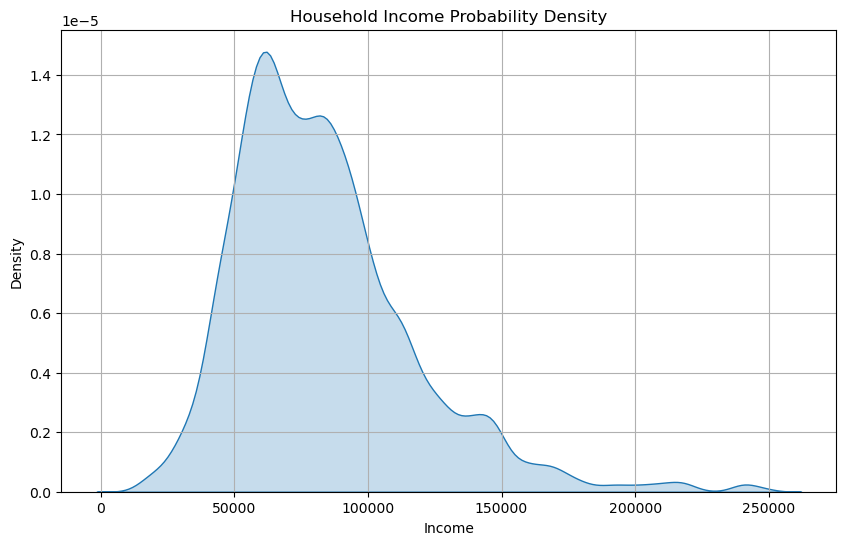

In [219]:
import seaborn as sns

income_values = df['Household Median Income']

plt.figure(figsize=(10, 6))
sns.kdeplot(income_values, shade=True)
plt.title('Household Income Probability Density')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [160]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [161]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

    
df_test = df

models = [RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]
def model_train(model):
   

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.5, random_state=42)

    # Initialize the RandomForestClassifier
    rf_model = model

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

   # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics for the current model
    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("\n")

for model in models:
    model_train(model)
    
    

Model: RandomForestClassifier
Accuracy: 0.32133152173913043
Precision: 0.31808387030701607
Recall: 0.32133152173913043
F1-Score: 0.31825717824637106




C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.2826086956521739
Precision: 0.2913599326720572
Recall: 0.2826086956521739
F1-Score: 0.27510760146805263


Model: KNeighborsClassifier
Accuracy: 0.27785326086956524
Precision: 0.2741390674003796
Recall: 0.27785326086956524
F1-Score: 0.27214536800180755


Model: GaussianNB
Accuracy: 0.27853260869565216
Precision: 0.2781166894315913
Recall: 0.27853260869565216
F1-Score: 0.26140303665297165


Model: DecisionTreeClassifier
Accuracy: 0.30366847826086957
Precision: 0.30461234492252315
Recall: 0.30366847826086957
F1-Score: 0.3019358388749023


Model: SVC
Accuracy: 0.2669836956521739
Precision: 0.2173488293573232
Recall: 0.2669836956521739
F1-Score: 0.22579847271976247




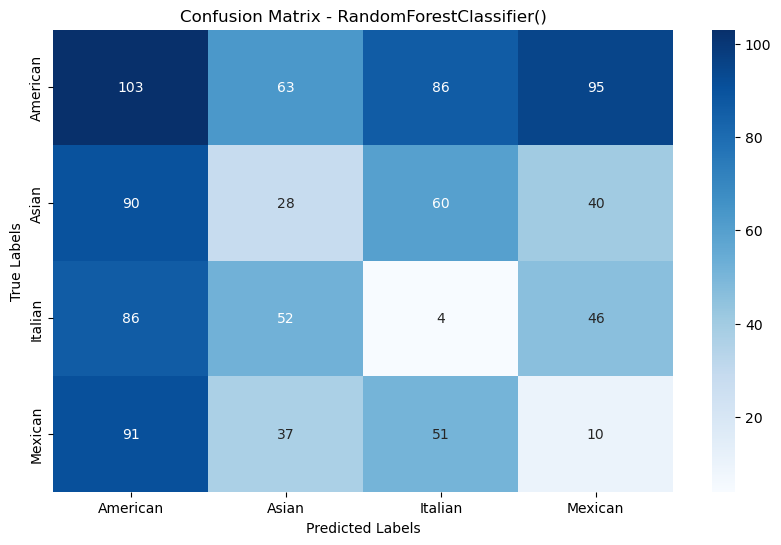

C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


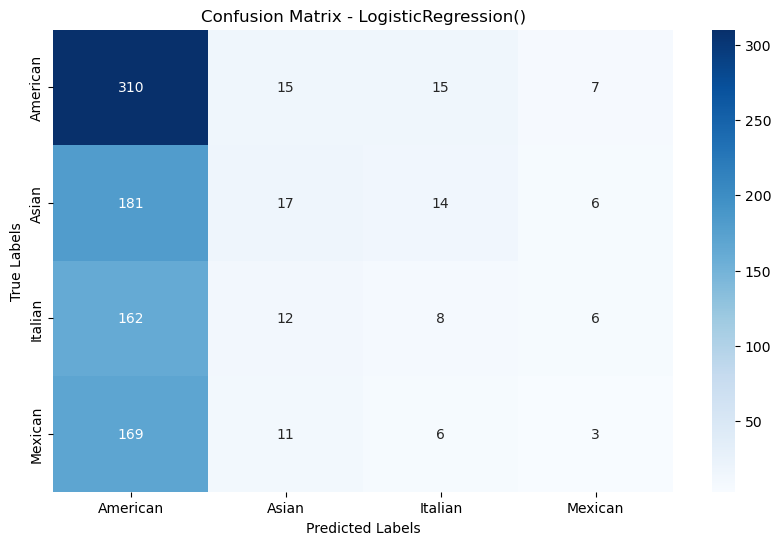

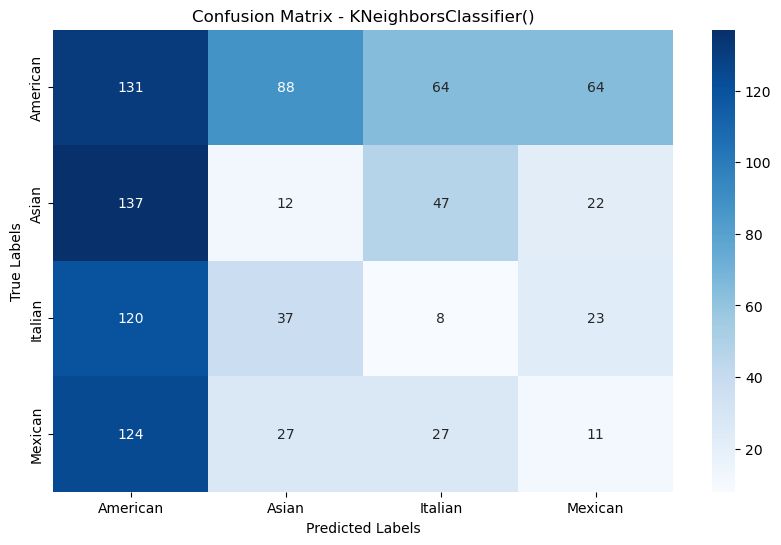

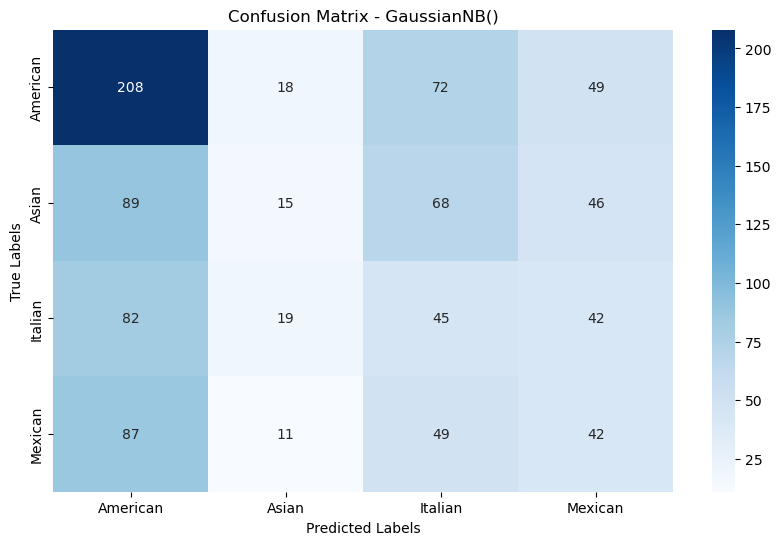

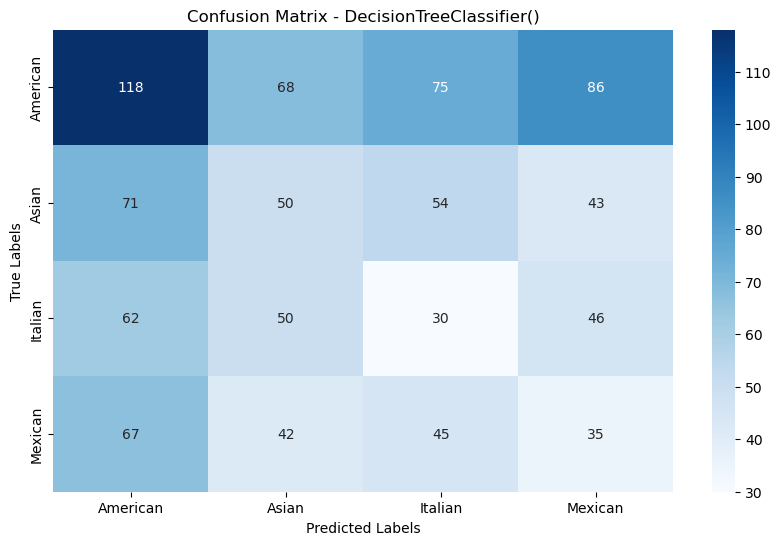

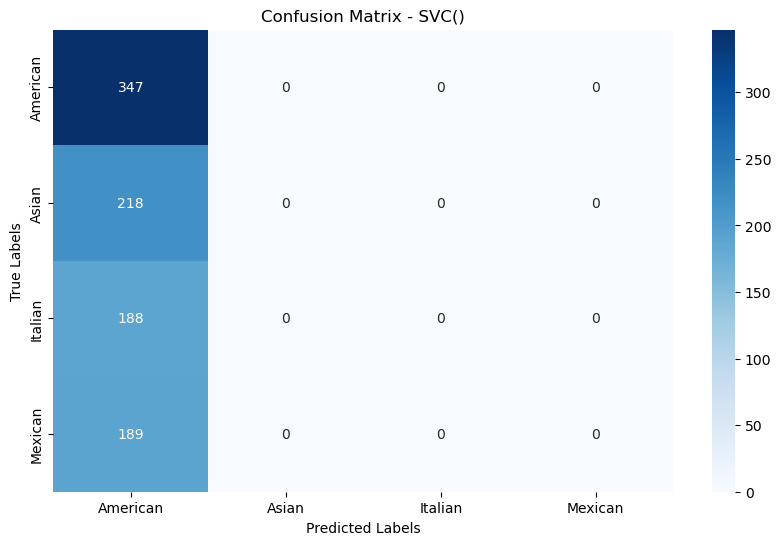

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]
def model_train(model):
    # Initialize the model
    model_instance = model
    
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model_instance.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print accuracy and confusion matrix
#     print(model, " Accuracy:", accuracy)
#     print("Confusion Matrix:\n", conf_matrix)
    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model}")
    plt.show()

for model in models:
    model_train(model)


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.27070063694267515


In [344]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Create a LogisticRegression classifier
lr_classifier = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)


C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.3609341825902335


In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load your dataset and preprocess as needed
data = df_test

# Perform label encoding on the 'category_1' column
label_encoder = LabelEncoder()
data['category_1_encoded'] = label_encoder.fit_transform(data['category_1'])

# Perform one-hot encoding on the encoded labels
category_onehot = to_categorical(data['category_1_encoded'], num_classes=len(label_encoder.classes_))
category_onehot_df = pd.DataFrame(category_onehot, columns=[f'category_1_onehot_{cls}' for cls in label_encoder.classes_])

# Concatenate the one-hot encoded DataFrame with the original data
data = pd.concat([data, category_onehot_df], axis=1)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# Define the neural network model
def create_model(input_dim, num_classes):
    input_layer = Input(shape=(input_dim,))
    hidden_layer = Dense(64, activation='relu')(input_layer)
    output_layer = Dense(1, activation='linear')(hidden_layer)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    return model


# Convert one-hot encoded labels to numpy arrays
y_train = train_data[[f'category_1_onehot_{cls}' for cls in label_encoder.classes_]]
y_test = test_data[[f'category_1_onehot_{cls}' for cls in label_encoder.classes_]]

train_data = train_data.drop(['category_1', 'category_1_encoded'] + [f'category_1_onehot_{cls}' for cls in label_encoder.classes_], axis=1)
test_data = test_data.drop(['category_1', 'category_1_encoded'] + [f'category_1_onehot_{cls}' for cls in label_encoder.classes_], axis=1)

# Train the model
model.fit(train_data, y_train, epochs=10, batch_size=33)

# Evaluate the model
loss = model.evaluate(test_data, y_test)
print(f"Test Loss: {loss}")


Epoch 1/10


ValueError: in user code:

    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nikhi\anaconda\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 33), found shape=(None, 28)


In [105]:
y_train

,category_1_onehot_American,category_1_onehot_Asian,category_1_onehot_Italian,category_1_onehot_Mexican
2784,0.0,0.0,0.0,1.0
1791,0.0,0.0,1.0,0.0
2825,1.0,0.0,0.0,0.0
1057,1.0,0.0,0.0,0.0
221,1.0,0.0,0.0,0.0
...,...,...,...,...
3092,0.0,0.0,0.0,1.0
1095,1.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,1.0
1294,0.0,0.0,1.0,0.0
